In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

from intersection_functions import *

In [289]:
def get_quadrant(angle):
    if angle > 2 * np.pi:
        raise ValueError('Angle must be between 0 and 2pi')
        
    if 0 <= angle < np.pi/2 or angle == 2 * np.pi:
        return 1
    if np.pi/2 <= angle < np.pi:
        return 2
    if np.pi<= angle < 3 *np.pi/2:
        return 3
    if 3 *np.pi/2 <= angle < 2 * np.pi:
        return 4

In [395]:
def plot_objects(a, b, spiral_radius_velocity, spiral_angle_velocity, init_spiral_angle):

    y_lim = (-20, 20)
    
    min_distance, angle_to_line = get_little_radius_vec(a, b)
 
    create_field()
   
    x_line, y_line = create_line(a, b, (-20, 20))
  
    x_help_line, y_help_line = create_line(a, 0, y_lim)

    x_spiral, y_spiral = create_spiral(r_incr_velocity = spiral_radius_velocity, 
                                       init_angle = init_spiral_angle,
                                       angle_velocity = spiral_angle_velocity)
   
    # Plot linear function
    plt.plot(x_line, y_line, color='blue', linewidth=1, linestyle='-')
    
    # Help line
    plt.plot(x_help_line, y_help_line, color='green', linewidth=1, linestyle='-')
   
    if b >0:
        angle_to_line += np.pi/2
   
    elif b <0:
        angle_to_line -= np.pi/2
       
    # Min distance from center to the line
    # plt.quiver(0,0,min_distance * np.cos(angle_to_line), min_distance * np.sin(angle_to_line),
    #            scale_units = "xy", scale = 1, linewidth = 0.01, color = 'black')

   
    # Plot spiral
    plt.plot(x_spiral, y_spiral, color = 'red', linewidth = 1, linestyle = '-')
    
    y_intersects = get_y_intersection_points(spiral_radius_velocity, spiral_angle_velocity, init_spiral_angle, y_lim)
    
    print('1st intersect: ', y_intersects[0], '2 intersect: ', y_intersects[1],)
    
    line_angle = get_angle(a, degrees= False) + np.pi
    
    w = 0
    for points in y_intersects:
        d = 1
        if w == 3:
            d = 2
        plt.scatter(points[0], points[1], color= 'black', s =d * 20)
        w+=1
    updated_y_intersection_points, real_intersection_points = rotate_y_intersection_points(a,b, y_intersects,line_angle, init_spiral_angle,
                                                               spiral_radius_velocity, spiral_angle_velocity, min_distance)
  
  
    for i in range(len(updated_y_intersection_points)):
        d = 1
        y_point = updated_y_intersection_points[i]
        y_real_point = real_intersection_points
        if i == 3:
            d = 3
        plt.scatter(y_point[0], y_point[1], color= 'green', s =  d * 20)
        # plt.scatter(y_real_point[0], y_real_point[1], color= 'purple', s = d*20)
                      
    plt.show()

In [446]:
def get_initial_parameters(quadrant, spiral_angle_velocity, init_spiral_angle):
    start_angle = 0
    
    if quadrant == 1:
        if spiral_angle_velocity > 0:
            angle_diff = np.pi/2 - init_spiral_angle
            start_angle =  np.pi/2
        elif spiral_angle_velocity < 0:
            angle_diff = np.pi/2 + init_spiral_angle
            start_angle =  -np.pi/2
        
    elif quadrant == 2:
        if spiral_angle_velocity > 0:
            angle_diff = np.pi/2 +  (np.pi - init_spiral_angle)
            start_angle = 3 * np.pi/2
            
        elif spiral_angle_velocity < 0:
            angle_diff = init_spiral_angle - np.pi/2
            start_angle = - 3 *  np.pi/2
        
    elif quadrant == 3:
        if spiral_angle_velocity > 0:
            angle_diff = 3 * np.pi/2 - init_spiral_angle
            start_angle = 3 * np.pi/2
            
        elif spiral_angle_velocity < 0:
            angle_diff = init_spiral_angle - np.pi/2
            start_angle = - 3 * np.pi/2
        
    else:
        if spiral_angle_velocity > 0:
            angle_diff = np.pi/2 + 2 * np.pi - init_spiral_angle
            start_angle = np.pi/2
        
        elif spiral_angle_velocity <0:
            angle_diff = init_spiral_angle - 3*np.pi/2
            start_angle = - np.pi/2
    return start_angle, angle_diff

In [449]:
def get_y_intersection_points(spiral_radius_velocity, spiral_angle_velocity, init_spiral_angle, y_lim):
    
    if init_spiral_angle < 0:
        raise ValueError('Init spiral angle must be non-negative')
        
    if init_spiral_angle == 2 * (np.pi):
        init_spiral_angle = 0
        
    y_intersection_points = []
    
    direction_coeff = 1 if spiral_angle_velocity > 0 else -1

    quadrant = get_quadrant(init_spiral_angle)

    start_angle, angle_diff = get_initial_parameters(quadrant, spiral_angle_velocity, init_spiral_angle)
            
        
    t = angle_diff / spiral_angle_velocity
    spiral_radius_magnitude = t * spiral_radius_velocity
    y_intersection_points.append([0, direction_coeff * spiral_radius_magnitude * np.sin(start_angle)])

    if abs(spiral_radius_magnitude)< np.mean([abs(y_lim[0]), abs(y_lim[1])]):

        while abs(spiral_radius_magnitude)< np.mean([abs(y_lim[0]), abs(y_lim[1])]):
            # print('spiral_radius_magnitude: ', spiral_radius_magnitude, spiral_radius_magnitude< np.mean([abs(y_lim[0]), abs(y_lim[1])]))
            start_angle +=  np.pi
            t = np.pi / spiral_angle_velocity
            spiral_radius_magnitude += t * spiral_radius_velocity
            y_intersection_points.append([0,direction_coeff * spiral_radius_magnitude * np.sin(start_angle)])

      
    return y_intersection_points

351.0
1st intersect:  [0, 1.1519173063162575] 2 intersect:  [0, -3.2463124087094526]


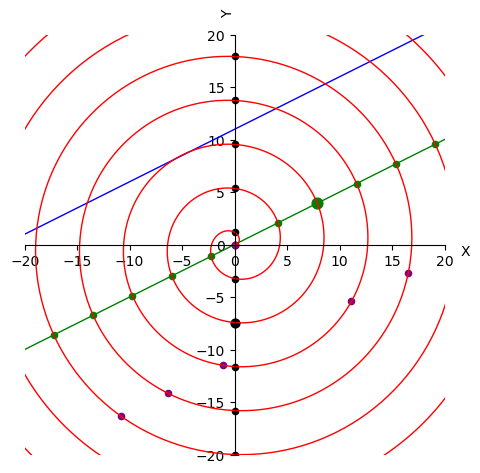

In [450]:
# Define line and spiral variables
a = 0.5
b = 10.98

spiral_radius_velocity = 1
init_spiral_angle = 3.9 * (np.pi/2)
spiral_angle_velocity = 1.5
print(init_spiral_angle * 180/np.pi)
plot_objects(a, b,spiral_radius_velocity, spiral_angle_velocity, init_spiral_angle)

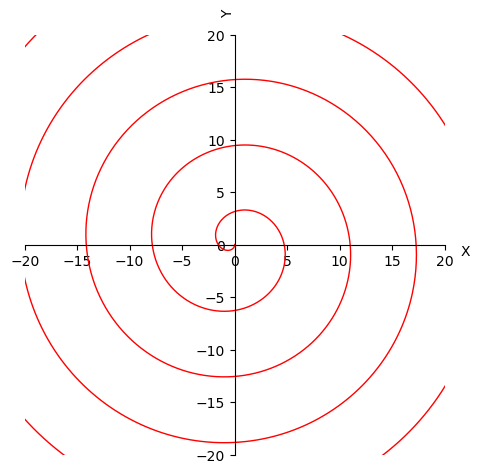

In [308]:
create_field()
x,y = create_spiral(angle_velocity=-1, init_angle=-np.pi/2)
plt.plot(x, y,color = 'red', linewidth = 1, linestyle = '-')
plt.show()

In [288]:
for i in range(4):
    print(i)

0
1
2
3
